## Loading and plotting of real _C. elegans_ datasets.
---
*Last updated: 17 June 2024*

We have obtained "whole brain" calcium imaging data from a few open source datasets. 

 ______________________________________________________________________________________________________________________________________________________________________
|Paper link              |Database link                |Data files                 |Num. worms |Mean num. neurons (labeled, recorded) |Num. labeled neurons (min, max) |
|------------------------|-----------------------------|---------------------------|-----------|--------------------------------------|--------------------------------|
|(unpublished data)      |chemosensory-data.worm.world |`2022*_herm_*.zip`         |      22   |             (187, 187)               |          (185, 189)            |
|tinyurl.com/ALin2023    |tinyurl.com/dropboxLin2023   |`run*_prfrd_data*.mat`     |     577   |               (8, 8)                 |             (1, 22)            |
|tinyurl.com/Leifer2023  |tinyurl.com/driveLeifer2023  |`exported_data.tar.gz`     |     108   |              (64, 68)                |            (19, 98)            |
|tinyurl.com/Flavell2023 |wormwideweb.org              |`YYYY-MM-DD-*.json/h5`     |      42   |              (88, 136)               |            (64, 115)           |
|tinyurl.com/UDag2023    |tinyurl.com/githubDag2023    |`data/swf702_with_id/*.h5` |       7   |             (100, 143)               |            (87, 110)           |
|tinyurl.com/Uzel2022    |osf.io/3vkxn/                |`Uzel_WT.mat`              |       6   |              (50, 138)               |            (46, 58)            |
|tinyurl.com/Yemini2021  |zenodo.org/records/3906530   |`*_Activity_OH*.mat`       |      49   |             (110, 125)               |            (33, 179)           |
|tinyurl.com/Nejat2020   |tinyurl.com/dandiNejat2020   |`sub-2019*_ses*_ophys.nwb` |      21   |              (174, 175)              |            (163, 184)          |
|tinyurl.com/Kaplan2020a |osf.io/9nfhz/                |`Neuron2019_Data_*.mat`    |      19   |              (36, 114)               |            (23, 51)            |
|tinyurl.com/Skora2018   |osf.io/za3gt/                |`WT_*.mat`                 |      12   |              (46, 129)               |            (39, 55)            |
|tinyurl.com/Nichols2017 |osf.io/kbf38/                |`*let.mat`                 |      44   |              (34, 108)               |            (23, 43)            |
|tinyurl.com/Kato2015    |osf.io/2395t/                |`WT_*Stim.mat`             |      12   |              (42, 127)               |            (31, 51)            |
|________________________|_____________________________|___________________________|___________|______________________________________|________________________________|

[TODO] tinyurl these 
 - dandiarchive.org/dandiset/000541 -> tinyurl.com/dandiNejat2020
 - https://doi.org/10.1101/2020.07.07.192120 -> tinyurl.com/Nejat2020 
 - https://doi.org/10.1016/j.cell.2023.04.023 -> tinyurl.com/UDag2023 
 - https://github.com/flavell-lab/NSM_5HTR_analysis/tree/main/data -> tinyurl.com/githubDag2023 


### What's the distinction between "whole-brain" and "whole-nervous system" recordings? 

The nervous system of the _C. elegans_ hermaphrodite is composed of 300 neurons that are organized in several 
ganglia in the head and tail and into a spinal cord-like ventral nerve cord [1]. The majority of the neurons 
is located in the head, where they are organised in a number of ganglia surrounding the pharynx, forming the 
brain of the animal [2].

References:
- [1] http://www.wormbook.org/chapters/www_specnervsys.2/neurogenesis.html<br>
- [2] https://www.sfu.ca/biology/faculty/hutter/hutterlab/research/Ce_nervous_system.html<br>

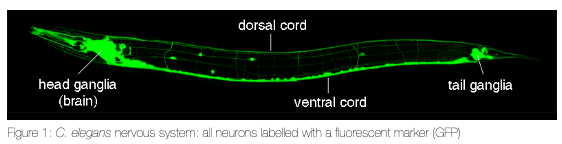

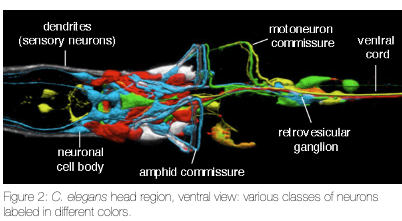

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from utils import init_random_seeds
from visualize._utils import plot_worm_data
from data._utils import pick_worm, load_dataset

# Initialize the random seeds
init_random_seeds(42)

In [16]:
def helper(dataset_name: str):
    """Function we will call over and over again in this notebook"""
    # load the dataset
    dataset = load_dataset(dataset_name)
    print(len(dataset), dataset.keys(), end="\n\n")

    # number of ID'd neurons versus number of neurons measured
    neurons_stats = dict(min=float("inf"), max=float("-inf"))
    timesteps_stats = dict(min=float("inf"), max=float("-inf"))
    total_avg, named_avg = 0, 0
    for worm in list(dataset.keys()):
        single_worm_dataset = pick_worm(dataset, worm)
        total_neurons = single_worm_dataset["num_neurons"]
        labeled_neurons = single_worm_dataset["num_labeled_neurons"]
        max_timesteps = single_worm_dataset["max_timesteps"]
        total_avg += total_neurons / len(dataset)
        named_avg += labeled_neurons / len(dataset)
        neurons_stats["min"] = min(neurons_stats["min"], labeled_neurons)
        neurons_stats["max"] = max(neurons_stats["max"], labeled_neurons)
        timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
        timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
    print(f"Avg num. neuron ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
    print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
    print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")
    print(f"Avg num. ID'd : {int(named_avg)}/{int(total_avg)}")

    # get data for one worm
    worm = np.random.choice(list(dataset.keys()))
    single_worm_dataset = pick_worm(dataset, worm)

    # plot the calcium activity
    plot_worm_data(single_worm_dataset, max_timesteps=300, smooth=False)

    return dataset

12 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11'])

Avg num. neuron ID'd/recorded : 42/127
Range num. ID'd neurons : (31, 51)
Range len. calcium data : (2161, 3243)
Avg num. ID'd : 42/127


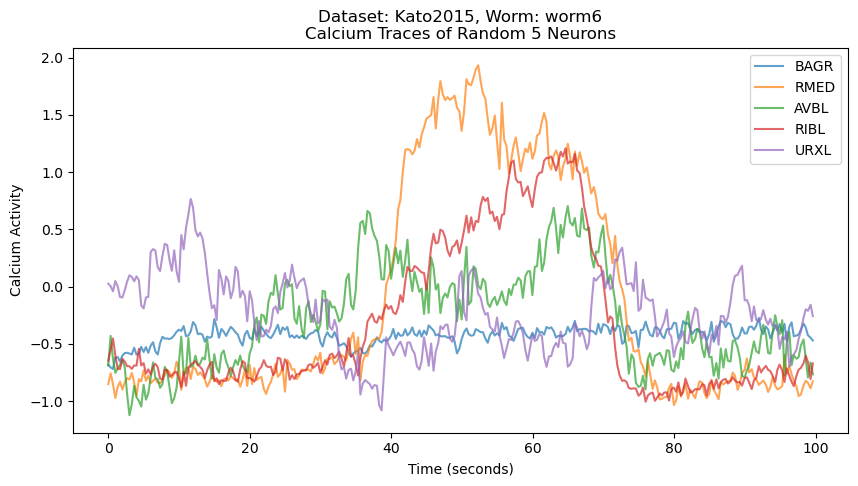

In [17]:
# @title Kato et al., Cell 2015, _Global Brain Dynamics Embed the Motor Command Sequence of Caenorhabditis elegans_
# @markdown Source: https://osf.io/2395t/

# load the dataset
dataset_name = "Kato2015"
dataset = helper(dataset_name)

44 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41', 'worm42', 'worm43'])

Avg num. neuron ID'd/recorded : 34/108
Range num. ID'd neurons : (23, 43)
Range len. calcium data : (3242, 3243)
Avg num. ID'd : 34/108


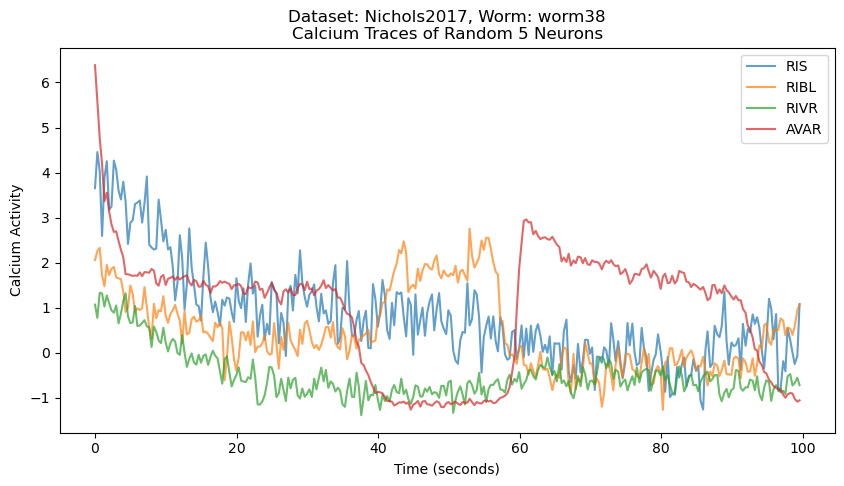

In [18]:
# @title Nichols et al., Science 2017, _A global brain state underlies C. elegans sleep behavior_
# @markdown Source: https://osf.io/kbf38/

# load the dataset
dataset_name = "Nichols2017"
dataset = helper(dataset_name)

12 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11'])

Avg num. neuron ID'd/recorded : 46/129
Range num. ID'd neurons : (39, 55)
Range len. calcium data : (3242, 3243)
Avg num. ID'd : 46/129


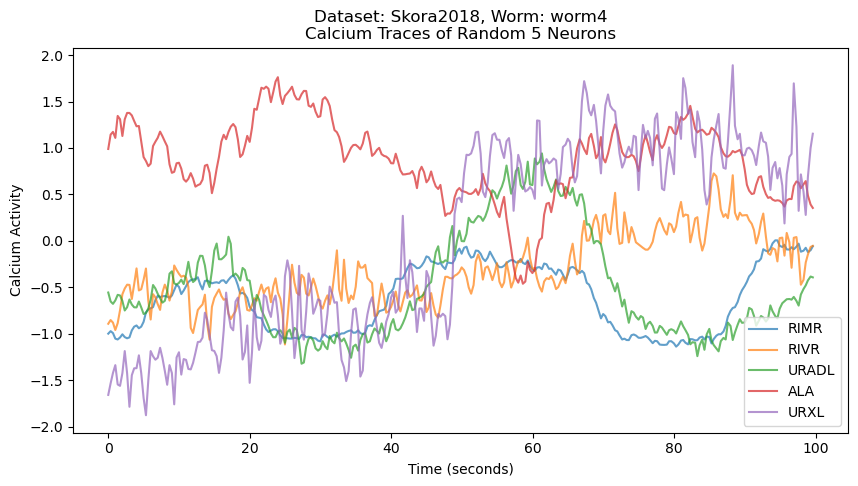

In [19]:
# @title Skora et al., Cell Reports 2018, _Energy Scarcity Promotes a Brain-wide Sleep State Modulated by Insulin Signaling in C. elegans_
# @markdown Source: https://osf.io/za3gt/

# load the dataset
dataset_name = "Skora2018"
dataset = helper(dataset_name)

19 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18'])

Avg num. neuron ID'd/recorded : 36/114
Range num. ID'd neurons : (23, 51)
Range len. calcium data : (5404, 5405)
Avg num. ID'd : 36/114


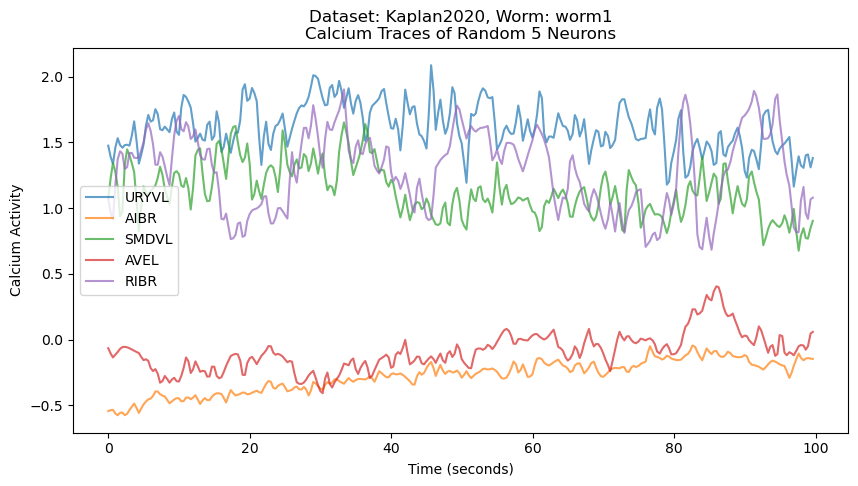

In [20]:
# @title Kaplan et al., Neuron 2020, _Nested Neuronal Dynamics Orchestrate a Behavioral Hierarchy across Timescales_
# @markdown Source: https://osf.io/9nfhz/

# load the dataset
dataset_name = "Kaplan2020"
dataset = helper(dataset_name)

21 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20'])

Avg num. neuron ID'd/recorded : 174/175
Range num. ID'd neurons : (163, 184)
Range len. calcium data : (702, 721)
Avg num. ID'd : 174/175


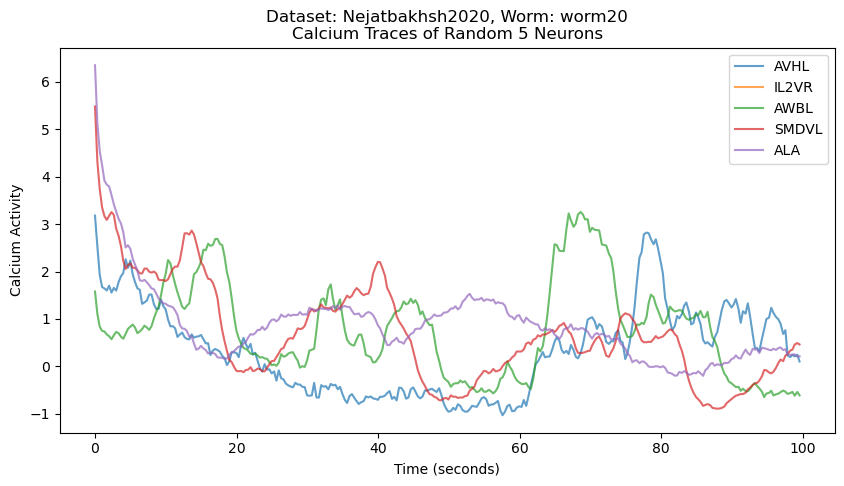

In [21]:
# @title Nejatbakhsh, A., Varol, E., Yemini, E., Venkatachalam, V., Lin, A., Samuel, A. D. T., & Paninski, L. (2020). Extracting neural signals from semi-immobilized animals with deformable non-negative matrix factorization. In bioRxiv (p. 2020.07.07.192120). https://doi.org/10.1101/2020.07.07.192120
# @markdown Source: https://dandiarchive.org/dandiset/000541

# load the dataset
dataset_name = "Nejatbakhsh2020"
dataset = helper(dataset_name)

49 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41', 'worm42', 'worm43', 'worm44', 'worm45', 'worm46', 'worm47', 'worm48'])

Avg num. neuron ID'd/recorded : 110/125
Range num. ID'd neurons : (33, 179)
Range len. calcium data : (693, 717)
Avg num. ID'd : 110/125


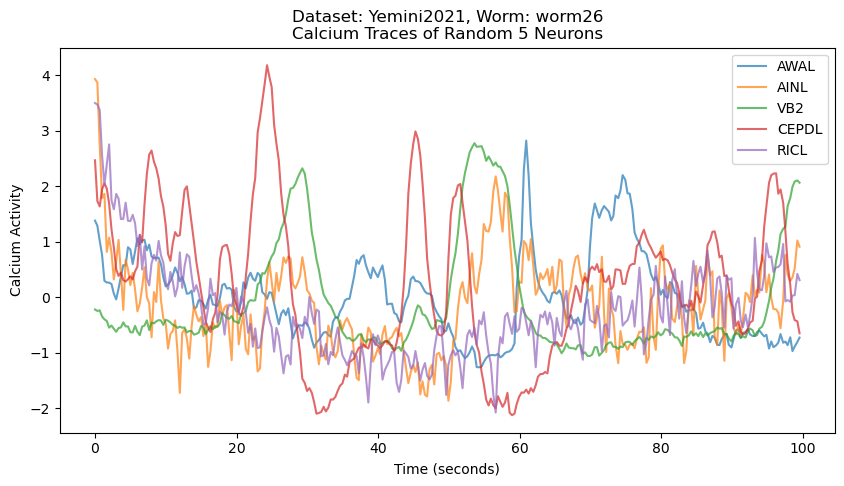

In [22]:
# @title Yemini et al., Cell CurrBio 2022, _NeuroPAL: A Multicolor Atlas for Whole-Brain Neuronal Identification in C. elegans_
# @markdown Source: https://zenodo.org/records/3906530

# load the dataset
dataset_name = "Yemini2021"
dataset = helper(dataset_name)

6 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5'])

Avg num. neuron ID'd/recorded : 50/138
Range num. ID'd neurons : (46, 58)
Range len. calcium data : (3242, 3242)
Avg num. ID'd : 50/138


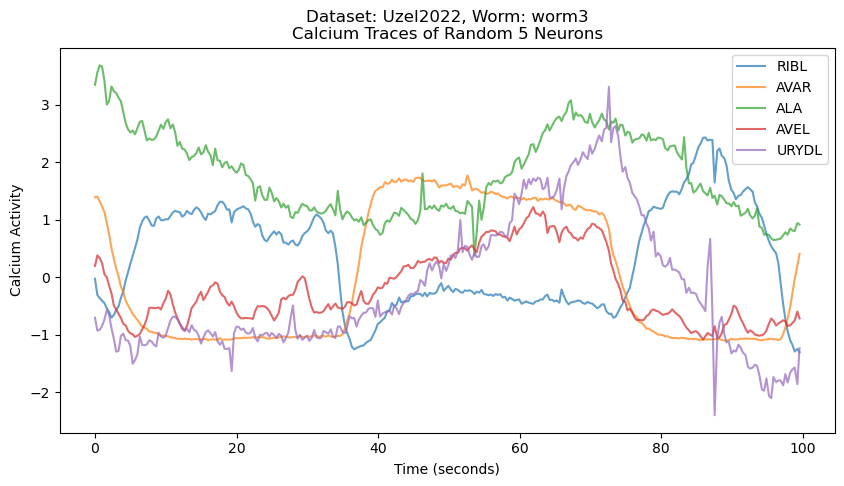

In [23]:
# @title Uzel et al., Cell CurrBio 2022, _A set of hub neurons and non-local connectivity features support global brain dynamics in C. elegans_
# @markdown Source: https://osf.io/3vkxn/

# load the dataset
dataset_name = "Uzel2022"
dataset = helper(dataset_name)

7 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6'])

Avg num. neuron ID'd/recorded : 100/143
Range num. ID'd neurons : (87, 110)
Range len. calcium data : (1442, 1444)
Avg num. ID'd : 100/143


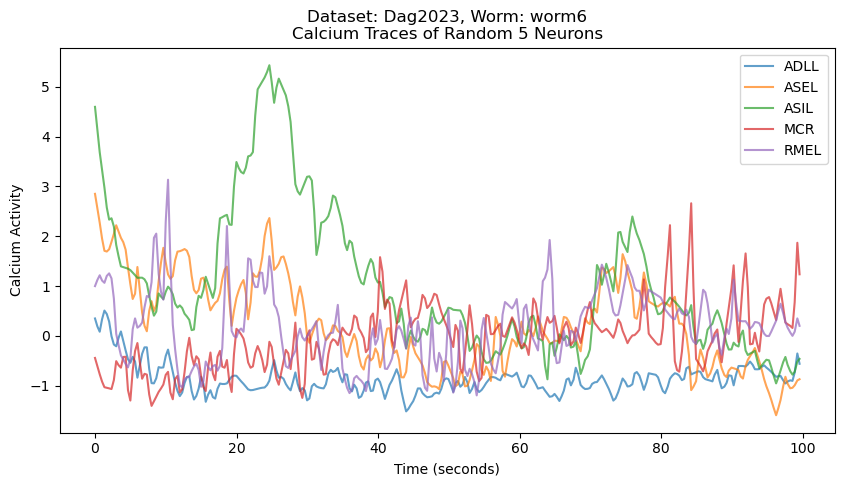

In [24]:
# @title Dag et al., Cell 2023. “_Dissecting the Functional Organization of the C. Elegans Serotonergic System at Whole-Brain Scale_
# @markdown Source: https://github.com/flavell-lab/NSM_5HTR_analysis/tree/main/data/swf702_with_id

# load the dataset
dataset_name = "Dag2023"
dataset = helper(dataset_name)

40 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39'])

Avg num. neuron ID'd/recorded : 88/136
Range num. ID'd neurons : (64, 115)
Range len. calcium data : (2889, 2916)
Avg num. ID'd : 88/136


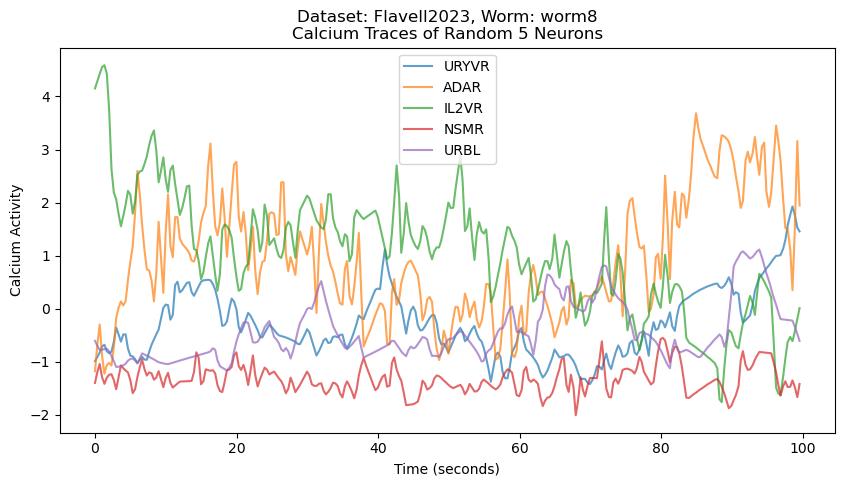

In [25]:
# @title Atanas & Kim et al., Cell 2023, _Brain-Wide Representations of Behavior Spanning Multiple Timescales and States in C. Elegans_
# @markdown Source: wormwideweb.org

# load the dataset
dataset_name = "Flavell2023"
dataset = helper(dataset_name)

110 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41', 'worm42', 'worm43', 'worm44', 'worm45', 'worm46', 'worm47', 'worm48', 'worm49', 'worm50', 'worm51', 'worm52', 'worm53', 'worm54', 'worm55', 'worm56', 'worm57', 'worm58', 'worm59', 'worm60', 'worm61', 'worm62', 'worm63', 'worm64', 'worm65', 'worm66', 'worm67', 'worm68', 'worm69', 'worm70', 'worm71', 'worm72', 'worm73', 'worm74', 'worm75', 'worm76', 'worm77', 'worm78', 'worm79', 'worm80', 'worm81', 'worm82', 'worm83', 'worm84', 'worm85', 'worm86', 'worm87', 'worm88', 'worm89', 'worm90', 'worm91', 'worm92', 'worm93', 'worm94', 'worm95', 'worm96', 'worm97', 'worm98', 'worm

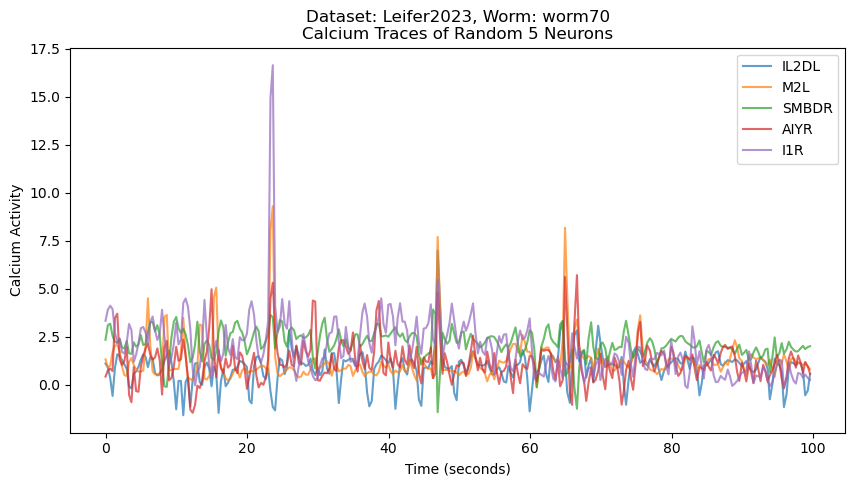

In [26]:
# @title Randi et al., Nature 2023. _Neural Signal Propagation Atlas of Caenorhabditis Elegans_
# @markdown Source: https://osf.io/e2syt/

# load the dataset
dataset_name = "Leifer2023"
dataset = helper(dataset_name)

577 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41', 'worm42', 'worm43', 'worm44', 'worm45', 'worm46', 'worm47', 'worm48', 'worm49', 'worm50', 'worm51', 'worm52', 'worm53', 'worm54', 'worm55', 'worm56', 'worm57', 'worm58', 'worm59', 'worm60', 'worm61', 'worm62', 'worm63', 'worm64', 'worm65', 'worm66', 'worm67', 'worm68', 'worm69', 'worm70', 'worm71', 'worm72', 'worm73', 'worm74', 'worm75', 'worm76', 'worm77', 'worm78', 'worm79', 'worm80', 'worm81', 'worm82', 'worm83', 'worm84', 'worm85', 'worm86', 'worm87', 'worm88', 'worm89', 'worm90', 'worm91', 'worm92', 'worm93', 'worm94', 'worm95', 'worm96', 'worm97', 'worm98', 'worm

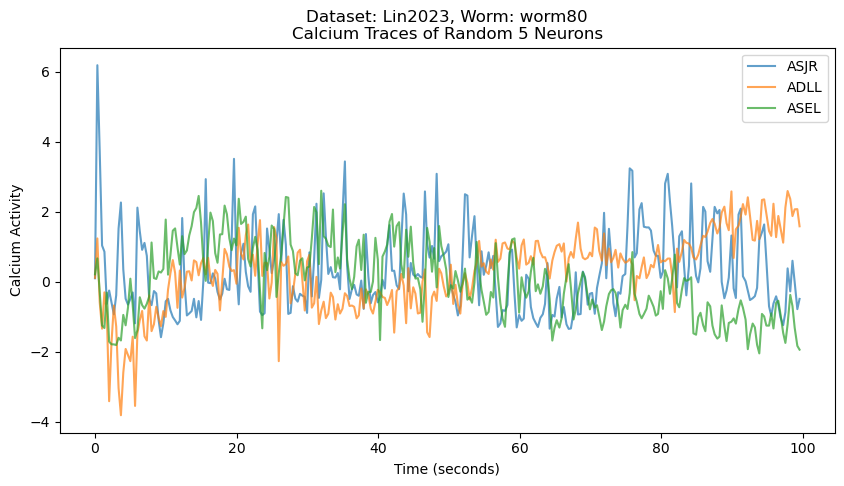

In [27]:
# @title Lin et al., Science Advances 2023, _Functional Imaging and Quantification of Multineuronal Olfactory Responses in C. Elegans_
# @markdown Source: https://www.dropbox.com/scl/fi/g6r1mg90n9o5gtm9he70x/raw_sensory_data_package.zip?rlkey=1n4lgipqghpr7s6bfw7sc9e11&dl=1

# load the dataset
dataset_name = "Lin2023"
dataset = helper(dataset_name)

21 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20'])

Avg num. neuron ID'd/recorded : 174/175
Range num. ID'd neurons : (163, 184)
Range len. calcium data : (702, 721)
Avg num. ID'd : 174/175


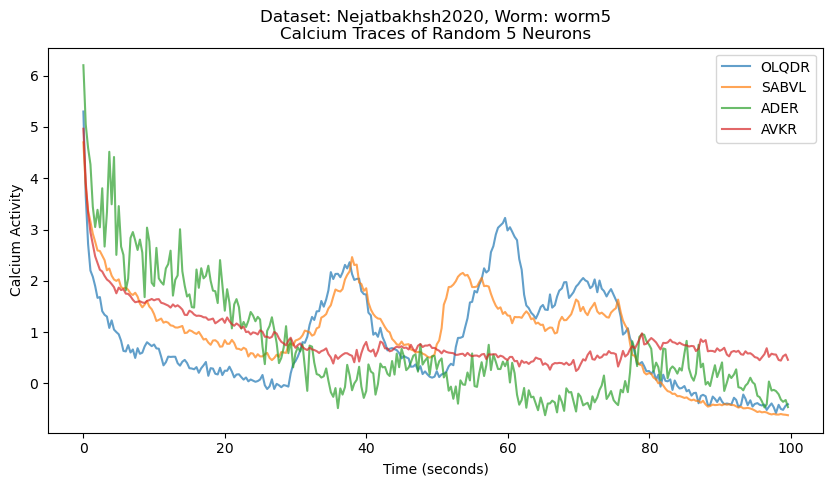

In [28]:
# @title Venkatachalam (2024). Email correspondence to Quilee Simeon from Vivek Venkatachalam "Re: Request for C. elegans neural data" on June 18, 2024
# @markdown Source: https://chemosensory-data.worm.world/

# load the dataset
dataset_name = "Nejatbakhsh2020"
dataset = helper(dataset_name)